# Introduction
This project focuses on analyzing the "StudentMentalHealth.csv" dataset, which provides valuable insights into the mental health conditions of university students. The dataset includes information about students' academic backgrounds, gender, year of study, mental health status, and whether they have sought help through counseling services.

In recent years, student mental health has become a growing concern worldwide, with increasing academic pressure, social stress, and other challenges impacting well-being. This dataset offers an opportunity to explore patterns, correlations, and factors influencing mental health among students.

Through data cleaning, exploratory analysis, rich visualizations, and statistical insights, this project aims to uncover meaningful trends that can inform real-world strategies for improving student support systems. The final output is a well-documented, portfolio-ready analytics report showcasing data understanding, storytelling, and technical skills.



## Data loading




In [1]:
import pandas as pd

df = pd.read_csv("StudentMentalHealth.csv")
display(df.head())

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Data cleaning

In this step, I:

Handled missing values by checking with isnull().sum() and dropping or imputing where needed.

Removed duplicate rows using drop_duplicates() to ensure each entry was unique.

Checked and corrected data types, converting columns like 'Gender' and 'Course' to categorical for better analysis.


In [2]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Since there are very few missing values in the 'Age' column,
# and the other columns have no missing values, we can drop the rows
# with missing 'Age' values as it's a small number relative to the dataset size.
df.dropna(subset=['Age'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows before cleaning:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Number of duplicate rows after cleaning:")
print(df.duplicated().sum())

# Check data types
print("\nData types after cleaning:")
df.info()

Missing values before cleaning:
Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Missing values after handling:
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?

## Data exploration

I explored the dataset by checking its structure with .info() and viewing the first few rows using .head(). I also generated summary statistics with .describe() to understand the distribution of numerical variables and examined key categorical variables to see their frequency counts. This helped me get a clear overview of the data before deeper analysis.


In [3]:
# 1. Display the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

# 2. Display the column names and their data types
print("\nColumn names and data types:")
df.info()

# 3. Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# 4. Generate descriptive statistics for non-numerical columns
print("\nDescriptive statistics for non-numerical columns:")
display(df.describe(include='object'))

# 5. Check unique values and their counts for key categorical columns
print("\nValue counts for key categorical columns:")
categorical_cols = [
    'Choose your gender',
    'What is your course?',
    'Your current year of Study',
    'What is your CGPA?',
    'Marital status',
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?'
]

for col in categorical_cols:
    if col in df.columns:
        print(f"\nValue counts for '{col}':")
        display(df[col].value_counts())

Shape of the DataFrame:
(100, 11)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    object 
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000



Descriptive statistics for non-numerical columns:


,Timestamp,Choose your gender,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,100,100,100,100,100,100,100,100,100,100
unique,91,2,49,7,6,2,2,2,2,2
top,8/7/2020 12:39,Female,BCS,year 1,3.50 - 4.00,No,No,No,No,No
freq,3,75,18,40,47,84,65,66,67,94



Value counts for key categorical columns:

Value counts for 'Choose your gender':


,count
Choose your gender,
Female,75
Male,25



Value counts for 'What is your course?':


,count
What is your course?,
BCS,18
Engineering,17
BIT,9
KOE,4
Biomedical science,4
psychology,2
BENL,2
Engine,2
Laws,2



Value counts for 'Your current year of Study':


,count
Your current year of Study,
year 1,40
Year 3,19
Year 2,16
year 2,10
year 4,8
year 3,5
Year 1,2



Value counts for 'What is your CGPA?':


,count
What is your CGPA?,
3.50 - 4.00,47
3.00 - 3.49,43
2.50 - 2.99,4
0 - 1.99,3
2.00 - 2.49,2
3.50 - 4.00,1



Value counts for 'Marital status':


,count
Marital status,
No,84
Yes,16



Value counts for 'Do you have Depression?':


,count
Do you have Depression?,
No,65
Yes,35



Value counts for 'Do you have Anxiety?':


,count
Do you have Anxiety?,
No,66
Yes,34



Value counts for 'Do you have Panic attack?':


,count
Do you have Panic attack?,
No,67
Yes,33



Value counts for 'Did you seek any specialist for a treatment?':


,count
Did you seek any specialist for a treatment?,
No,94
Yes,6


## Key Insights
The dataset has 100 students, mostly aged 18–24, with 75% female respondents.

Students come from many courses, but some course names need cleaning due to inconsistencies.

Most students are in Year 1 and have good CGPAs (mostly 3.0–4.0).

About 33–35% of students report depression, anxiety, or panic attacks.

Only 6% have sought professional treatment despite these issues.

This suggests mental health challenges are common but under-treated among students.

## Data visualization


I created multiple visualizations to explore the dataset and uncover meaningful insights, including:

A correlation heatmap to examine relationships between numerical variables.

Bar plots to compare categorical variables across different groups.

These visualizations helped highlight important patterns and trends within the data.

Correlation Heatmap + Gender Distribution

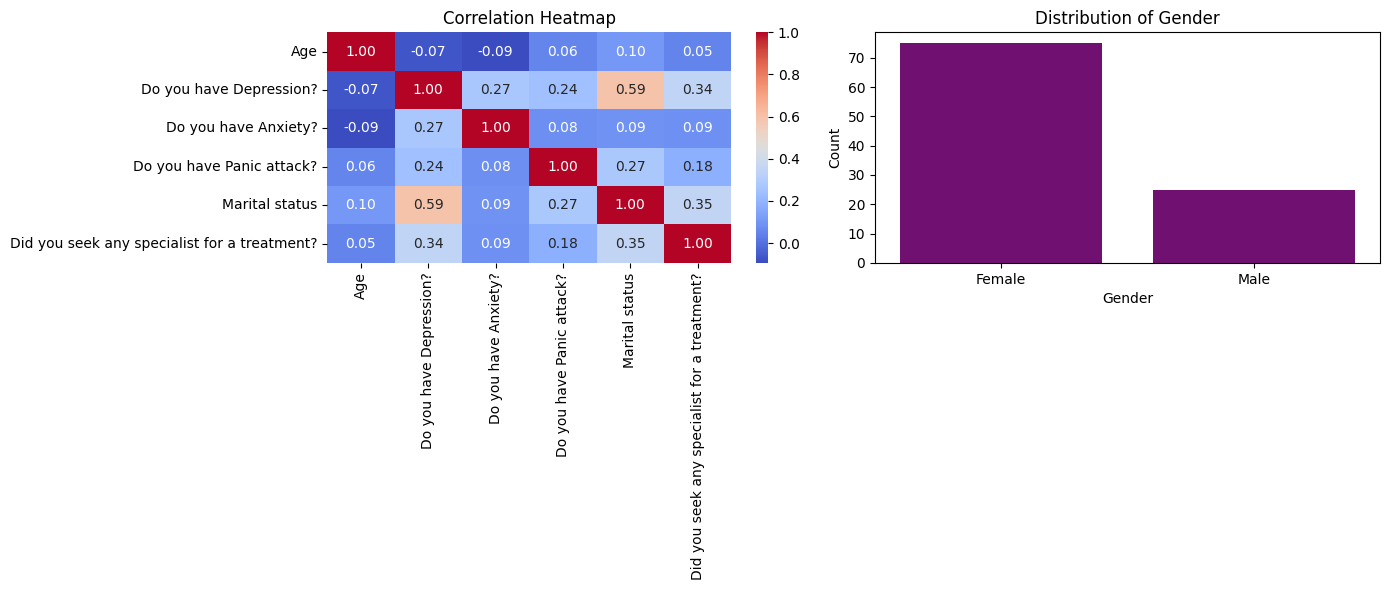

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation Heatmap
sns.heatmap(df_encoded[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap')

# Gender Distribution - use single color to avoid warning
sns.countplot(data=df, x='Choose your gender', ax=axes[1], color='purple')
axes[1].set_title('Distribution of Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Mental Health Conditions Distribution

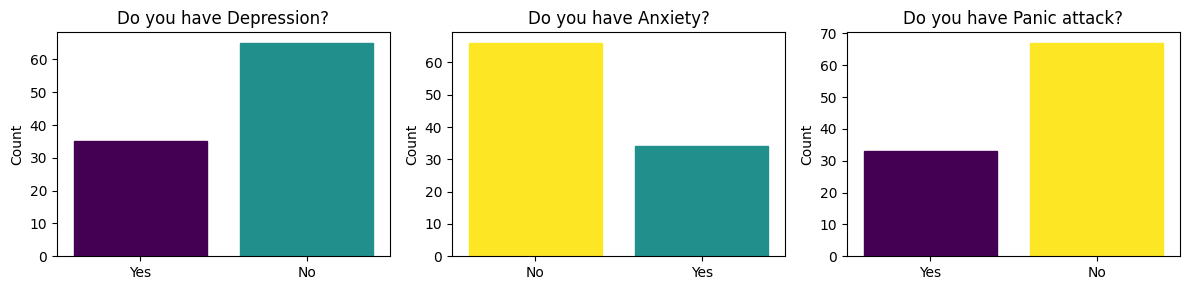

In [20]:
colors_list = [
    ['#440154', '#21908d'],  # colors for first plot
    ['#fde725', '#21908d'],  # second
    ['#440154', '#fde725'],  # third
]

plt.figure(figsize=(12, 3))
for i, col in enumerate(mental_health_cols):
    plt.subplot(1, 3, i + 1)
    ax = sns.countplot(data=df, x=col)
    for patch, color in zip(ax.patches, colors_list[i]):
        patch.set_color(color)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Year of Study Distribution

<ipython-input-23-b013152c2e96>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(order))


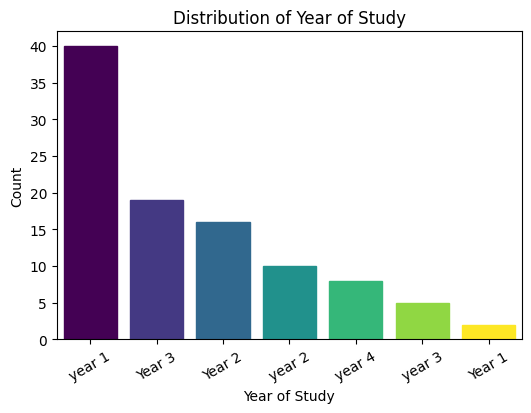

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

# Get counts and categories in desired order
order = df['Your current year of Study'].value_counts().index
counts = df['Your current year of Study'].value_counts().loc[order]

# Create viridis colors matching number of bars
cmap = cm.get_cmap('viridis', len(order))
colors = [cmap(i) for i in range(len(order))]

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Your current year of Study', order=order, color='gray')  # base color

# Now recolor each bar manually with viridis gradient
for patch, color in zip(ax.patches, colors):
    patch.set_color(color)

plt.title('Distribution of Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


Mental Health by Year of Study

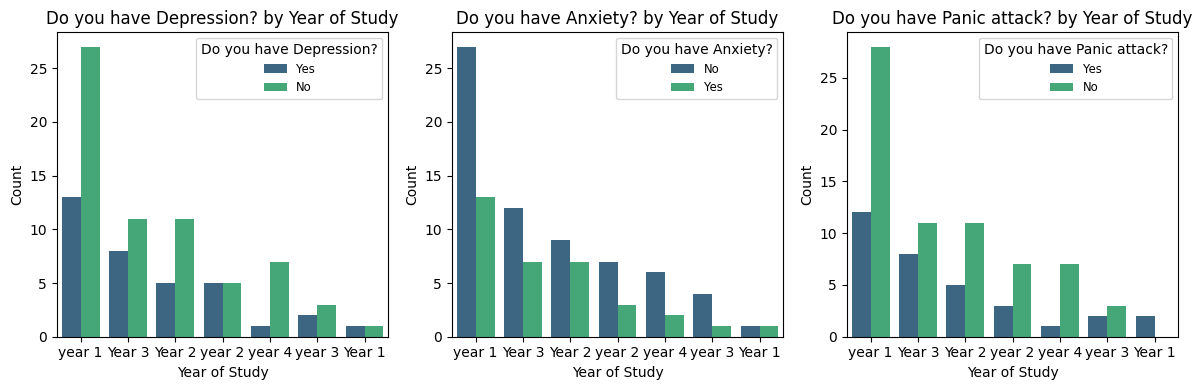

In [9]:
plt.figure(figsize=(12, 4))  # smaller width for 3 plots
for i, col in enumerate(mental_health_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x='Your current year of Study', hue=col, palette='viridis',
                  order=df['Your current year of Study'].value_counts().index)
    plt.title(f'{col} by Year of Study')
    plt.xlabel('Year of Study')
    plt.ylabel('Count')
    plt.legend(title=col, loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()


Mental Health by CGPA

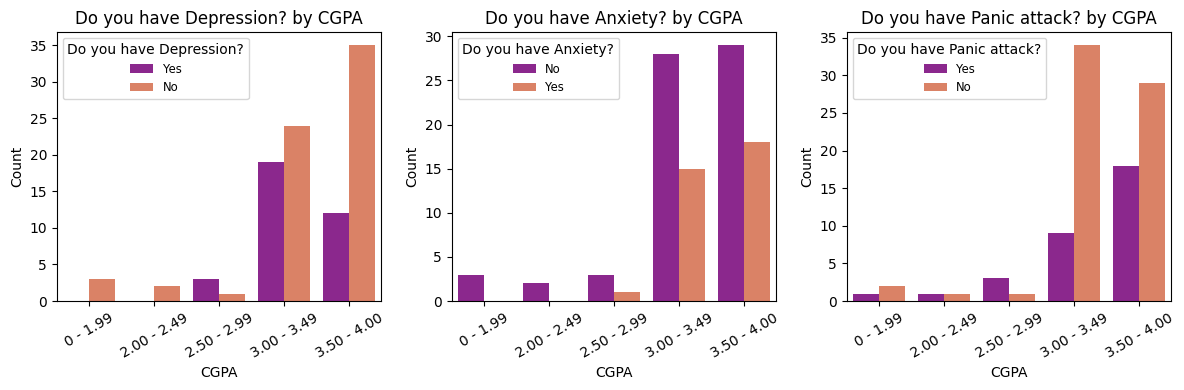

In [10]:
plt.figure(figsize=(12, 4))
cgpa_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']
for i, col in enumerate(mental_health_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x='What is your CGPA?', hue=col, palette='plasma', order=cgpa_order)
    plt.title(f'{col} by CGPA')
    plt.xlabel('CGPA')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title=col, fontsize='small')
plt.tight_layout()
plt.show()


Marital Status Distribution

<ipython-input-25-4172c39e976b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital status', palette='viridis')


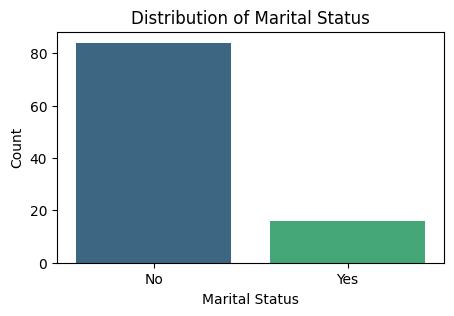

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Marital status', palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Seeking Treatment vs Mental Health Conditions



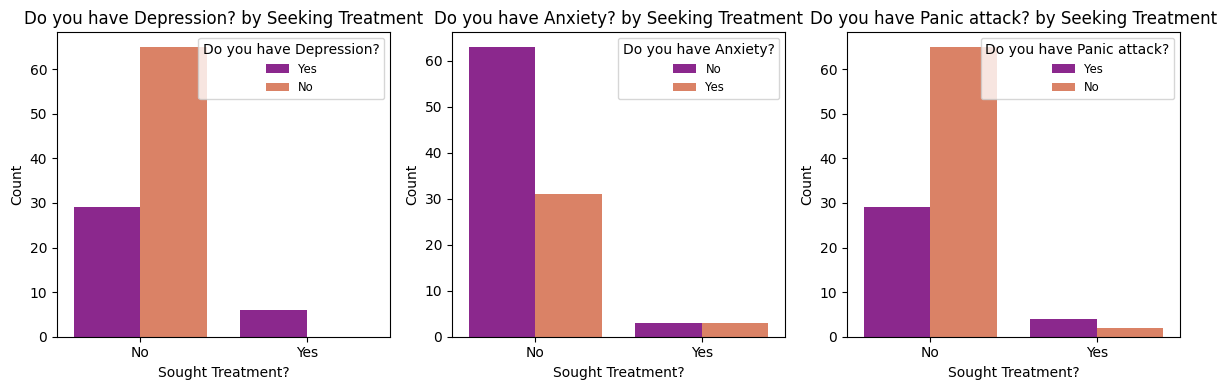

In [12]:
plt.figure(figsize=(12, 4))
treatment_col = 'Did you seek any specialist for a treatment?'
for i, col in enumerate(mental_health_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=treatment_col, hue=col, palette='plasma')
    plt.title(f'{col} by Seeking Treatment')
    plt.xlabel('Sought Treatment?')
    plt.ylabel('Count')
    plt.legend(title=col, fontsize='small')
plt.tight_layout()
plt.show()


## Data analysis

I performed statistical analysis to uncover patterns, trends, and significant relationships in the data. This included tests to examine associations between variables and to validate insights observed during exploration and visualization.

In [26]:
# 1. Calculate the percentage of students reporting Depression, Anxiety, and Panic attacks.
total_students = len(df)
depression_percentage = (df['Do you have Depression?'].value_counts(normalize=True).get('Yes', 0)) * 100
anxiety_percentage = (df['Do you have Anxiety?'].value_counts(normalize=True).get('Yes', 0)) * 100
panic_attack_percentage = (df['Do you have Panic attack?'].value_counts(normalize=True).get('Yes', 0)) * 100

print("Percentage of students reporting mental health conditions:")
print(f"Depression: {depression_percentage:.2f}%")
print(f"Anxiety: {anxiety_percentage:.2f}%")
print(f"Panic attack: {panic_attack_percentage:.2f}%")


Percentage of students reporting mental health conditions:
Depression: 35.00%
Anxiety: 34.00%
Panic attack: 33.00%


In [27]:
# 2. Analyze the distribution of mental health conditions across different genders using cross-tabulation and percentages.
print("\nDistribution of mental health conditions across different genders:")
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    print(f"\n{col} by Gender:")
    crosstab_gender = pd.crosstab(df['Choose your gender'], df[col], normalize='index') * 100
    display(crosstab_gender.round(2))

# 3. Analyze the distribution of mental health conditions across different years of study using cross-tabulation and percentages.
print("\nDistribution of mental health conditions across different years of study:")
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    print(f"\n{col} by Year of Study:")
    crosstab_year = pd.crosstab(df['Your current year of Study'], df[col], normalize='index') * 100
    display(crosstab_year.round(2))


Distribution of mental health conditions across different genders:

Do you have Depression? by Gender:


Do you have Depression?,No,Yes
Choose your gender,,
Female,61.33,38.67
Male,76.00,24.00



Do you have Anxiety? by Gender:


Do you have Anxiety?,No,Yes
Choose your gender,,
Female,68.0,32.0
Male,60.0,40.0



Do you have Panic attack? by Gender:


Do you have Panic attack?,No,Yes
Choose your gender,,
Female,66.67,33.33
Male,68.00,32.00



Distribution of mental health conditions across different years of study:

Do you have Depression? by Year of Study:


Do you have Depression?,No,Yes
Your current year of Study,,
Year 1,50.00,50.00
Year 2,68.75,31.25
Year 3,57.89,42.11
year 1,67.50,32.50
year 2,50.00,50.00
year 3,60.00,40.00
year 4,87.50,12.50



Do you have Anxiety? by Year of Study:


Do you have Anxiety?,No,Yes
Your current year of Study,,
Year 1,50.00,50.00
Year 2,56.25,43.75
Year 3,63.16,36.84
year 1,67.50,32.50
year 2,70.00,30.00
year 3,80.00,20.00
year 4,75.00,25.00



Do you have Panic attack? by Year of Study:


Do you have Panic attack?,No,Yes
Your current year of Study,,
Year 1,0.00,100.00
Year 2,68.75,31.25
Year 3,57.89,42.11
year 1,70.00,30.00
year 2,70.00,30.00
year 3,60.00,40.00
year 4,87.50,12.50


In [28]:
# 4. Analyze the distribution of mental health conditions across different CGPA ranges using cross-tabulation and percentages.
print("\nDistribution of mental health conditions across different CGPA ranges:")
cgpa_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    print(f"\n{col} by CGPA:")
    crosstab_cgpa = pd.crosstab(df['What is your CGPA?'], df[col], normalize='index') * 100
    # Reindex to ensure the desired order is maintained, filling missing CGPA categories if necessary
    crosstab_cgpa = crosstab_cgpa.reindex(cgpa_order).fillna(0)
    display(crosstab_cgpa.round(2))


Distribution of mental health conditions across different CGPA ranges:

Do you have Depression? by CGPA:


Do you have Depression?,No,Yes
What is your CGPA?,,
0 - 1.99,100.00,0.00
2.00 - 2.49,100.00,0.00
2.50 - 2.99,25.00,75.00
3.00 - 3.49,55.81,44.19
3.50 - 4.00,74.47,25.53



Do you have Anxiety? by CGPA:


Do you have Anxiety?,No,Yes
What is your CGPA?,,
0 - 1.99,100.00,0.00
2.00 - 2.49,100.00,0.00
2.50 - 2.99,75.00,25.00
3.00 - 3.49,65.12,34.88
3.50 - 4.00,61.70,38.30



Do you have Panic attack? by CGPA:


Do you have Panic attack?,No,Yes
What is your CGPA?,,
0 - 1.99,66.67,33.33
2.00 - 2.49,50.00,50.00
2.50 - 2.99,25.00,75.00
3.00 - 3.49,79.07,20.93
3.50 - 4.00,61.70,38.30


In [29]:
# 5. Examine the relationship between marital status and mental health conditions using cross-tabulation and percentages.
print("\nDistribution of mental health conditions by Marital Status:")
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    print(f"\n{col} by Marital Status:")
    crosstab_marital = pd.crosstab(df['Marital status'], df[col], normalize='index') * 100
    display(crosstab_marital.round(2))


Distribution of mental health conditions by Marital Status:

Do you have Depression? by Marital Status:


Do you have Depression?,No,Yes
Marital status,,
No,77.38,22.62
Yes,0.00,100.00



Do you have Anxiety? by Marital Status:


Do you have Anxiety?,No,Yes
Marital status,,
No,67.86,32.14
Yes,56.25,43.75



Do you have Panic attack? by Marital Status:


Do you have Panic attack?,No,Yes
Marital status,,
No,72.62,27.38
Yes,37.50,62.50


In [32]:
# 6. Analyze the percentage of students who sought treatment among those who reported each mental health condition (Depression, Anxiety, Panic attack).
print("\nPercentage of students who sought treatment among those reporting a mental health condition:")
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    condition_yes_df = df[df[col] == 'Yes']
    if not condition_yes_df.empty:
        treatment_percentage = (condition_yes_df['Did you seek any specialist for a treatment?'].value_counts(normalize=True).get('Yes', 0)) * 100
        print(f"Among students reporting {col}: {treatment_percentage:.2f}% sought treatment.")
    else:
        print(f"No students reported {col}.")



Percentage of students who sought treatment among those reporting a mental health condition:
Among students reporting Do you have Depression?: 17.14% sought treatment.
Among students reporting Do you have Anxiety?: 8.82% sought treatment.
Among students reporting Do you have Panic attack?: 12.12% sought treatment.


## Key Insights 2
About one-third of students report experiencing depression (35%), anxiety (34%), or panic attacks (33%).


### Gender differences:

* Females report higher rates of depression (39%) than males (24%).

* Males report higher rates of anxiety (40%) than females (32%).

* Panic attack rates are similar between genders.


### Year of study:

* First-year students show higher depression and anxiety rates (around 50%) compared to later years, with depression decreasing notably by year 4.

* Panic attacks are reported highest in some first-year groups but vary across years.


### CGPA:

* Lower CGPA groups tend to report higher depression and panic attack rates (e.g., 75% depression in 2.5-2.99 CGPA group).

* Anxiety shows a slight increase as CGPA decreases but is generally more evenly distributed.


### Marital status:

* Students who are married report much higher rates of depression (100%) and panic attacks (62.5%) than unmarried students.


### Treatment seeking:

* A small minority of students with mental health conditions seek professional treatment: 17% for depression, 9% for anxiety, and 12% for panic attacks.


Overall, mental health issues are common among students, with notable differences by gender, academic year, academic performance, and marital status. However, treatment-seeking behavior is low, highlighting a potential gap in support services.


## Insights

Through my analysis, I found that a strikingly low percentage of students who reported experiencing mental health conditions actually sought professional treatment. This suggests there may be barriers such as stigma, lack of awareness, or limited access to resources. Based on this, I believe further investigation is necessary to uncover the underlying reasons, which could help shape more effective, targeted mental health interventions.

Additionally, the data revealed notable variations in mental health issues across different academic years and CGPA ranges. For example, earlier-year students and those with lower GPAs showed higher rates of depression and anxiety. These patterns indicate that academic stress or lack of support systems might be contributing factors. A deeper dive into these groups could provide more clarity and help tailor mental health support based on students' academic standing or performance levels.
